##Source:

**Creator**:

Dr. WIlliam H. Wolberg (physician)

**University of Wisconsin Hospitals**

**Madison, Wisconsin, USA**

**Location:**

UCI data repository

Kaggle data repository

**Attribute Information:**

Sample code number: id number

Clump Thickness: 1 - 10

Uniformity of Cell Size: 1 - 10

Uniformity of Cell Shape: 1 - 10

Marginal Adhesion: 1 - 10

Single Epithelial Cell Size: 1 - 10

Bare Nuclei: 1 - 10

Bland Chromatin: 1 - 10

Normal Nucleoli: 1 - 10

Mitoses: 1 - 10

Class: (2 for benign, 4 for malignant)
Malignant==> Cancerous

Benign==> Not Cancerous (Healthy)

**Background**

All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually those cells behave in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the bloodstream and becoming is called a metastasis.

In summary, as we grow older,throughout a lifetime, we go through this knid of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.

This is what Dr. WIlliam H. Wolberg was observing and put together this dataset.

##Aurther :   Mohammed Fauzan

In [2]:
!pip install pyforest
import pyforest


  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=8bd8c3435115e4dc931c360d9e1059d5ba1b73caf5b6633f2e7b57aba85f17d5
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [3]:
data = pd.read_csv("/content/breastCancer.csv")

<IPython.core.display.Javascript object>

In [4]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.shape

(699, 11)

##Data pre-processing

In [6]:
data["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [8]:
data["bare_nucleoli"]# inspecting the 'bare_nucleoli' column

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [9]:
data[data["bare_nucleoli"]=="?"]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [10]:
## Here i assume the ? means the data was not present to be collected so proactively lets replace ? with NaN
df= data.replace('?', np.nan)

<IPython.core.display.Javascript object>

In [11]:
df.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [12]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [13]:
##Replacing all NaN values in bare_nucleoli with the median
df = df.fillna(df.median())

In [14]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [15]:
df["bare_nucleoli"].isnull().sum()

0

In [16]:
df["bare_nucleoli"] = df["bare_nucleoli"].astype('int64')

In [17]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

##Exploratory Data Analysis

In [18]:
#Dropping the index of the dataframe

df.drop('id', axis=1, inplace=True)

df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
df.describe().T ##Summary of the data features.

#Inferring from the std column we could tell the data is evenly distributed with the standard deviation clustering around 3 and 2

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [20]:
df.isna().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [21]:
import warnings

warnings.filterwarnings("ignore")

**Bivariate Data Analysis**

<IPython.core.display.Javascript object>

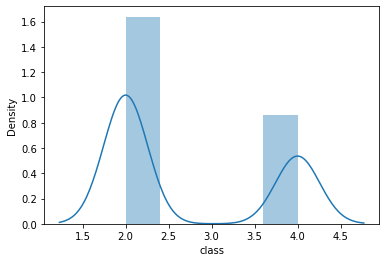

In [22]:
sns.distplot(df["class"]);

There are more benign than malignant and they are evenly distibuted

**Multivariate Data Analysis**

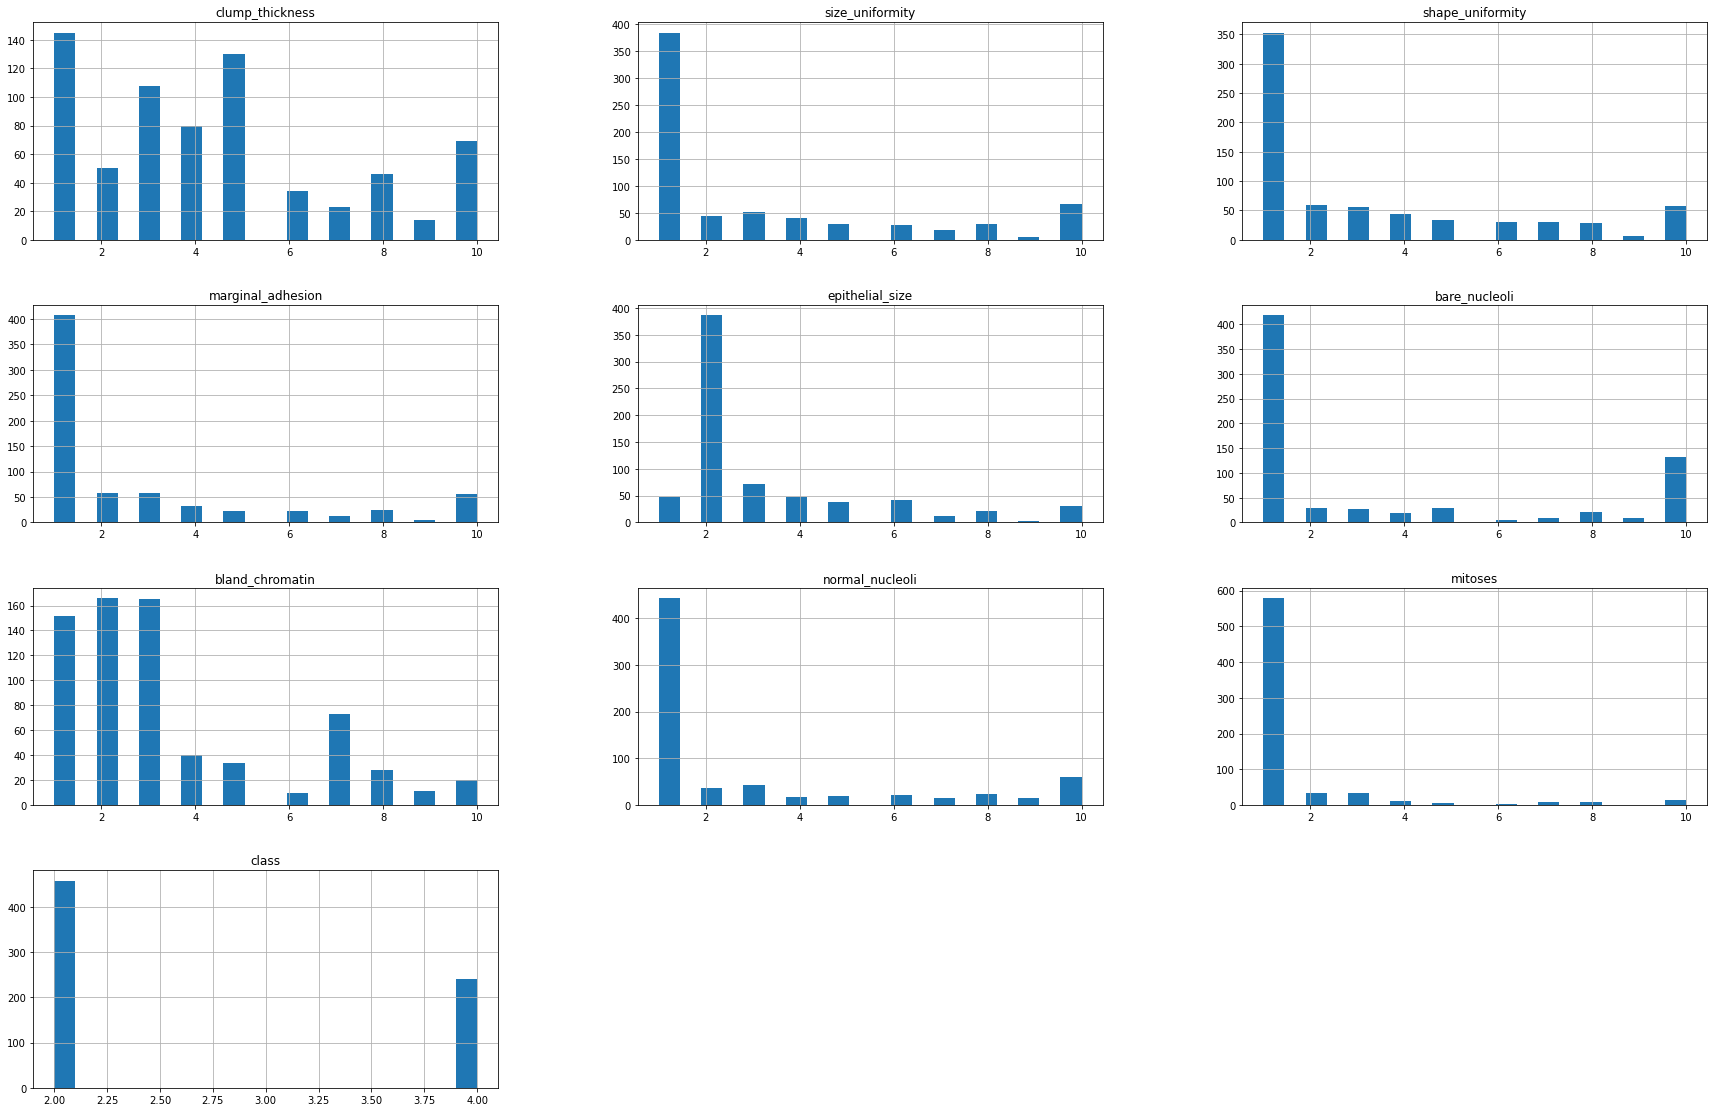

In [23]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

We can see more data points are positively skewed and only dump_thickness is normal skewed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

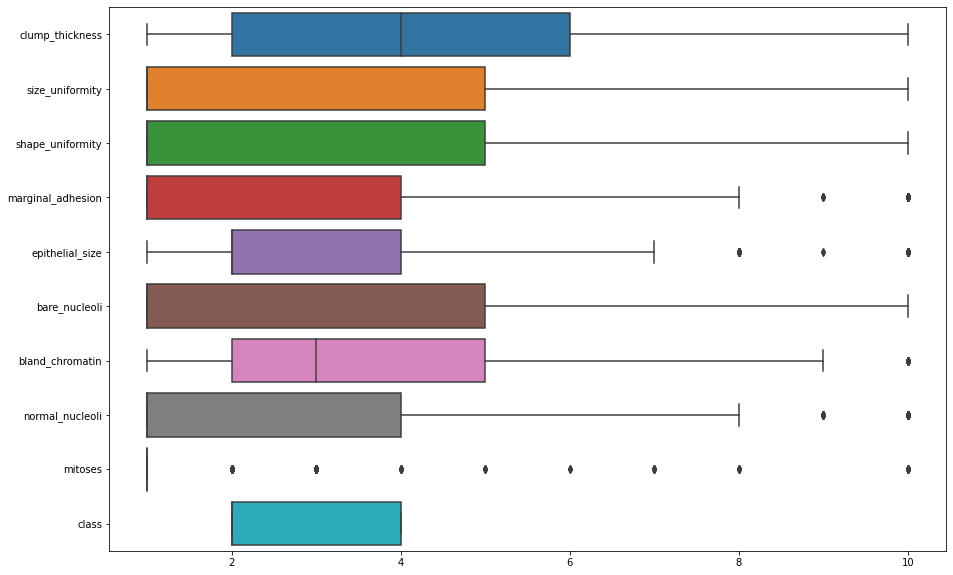

In [24]:
#Using the boxplot to confirm
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

There are some few outliers but we are not removing them since the data size is quite small and are not going to have a major impact on our model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

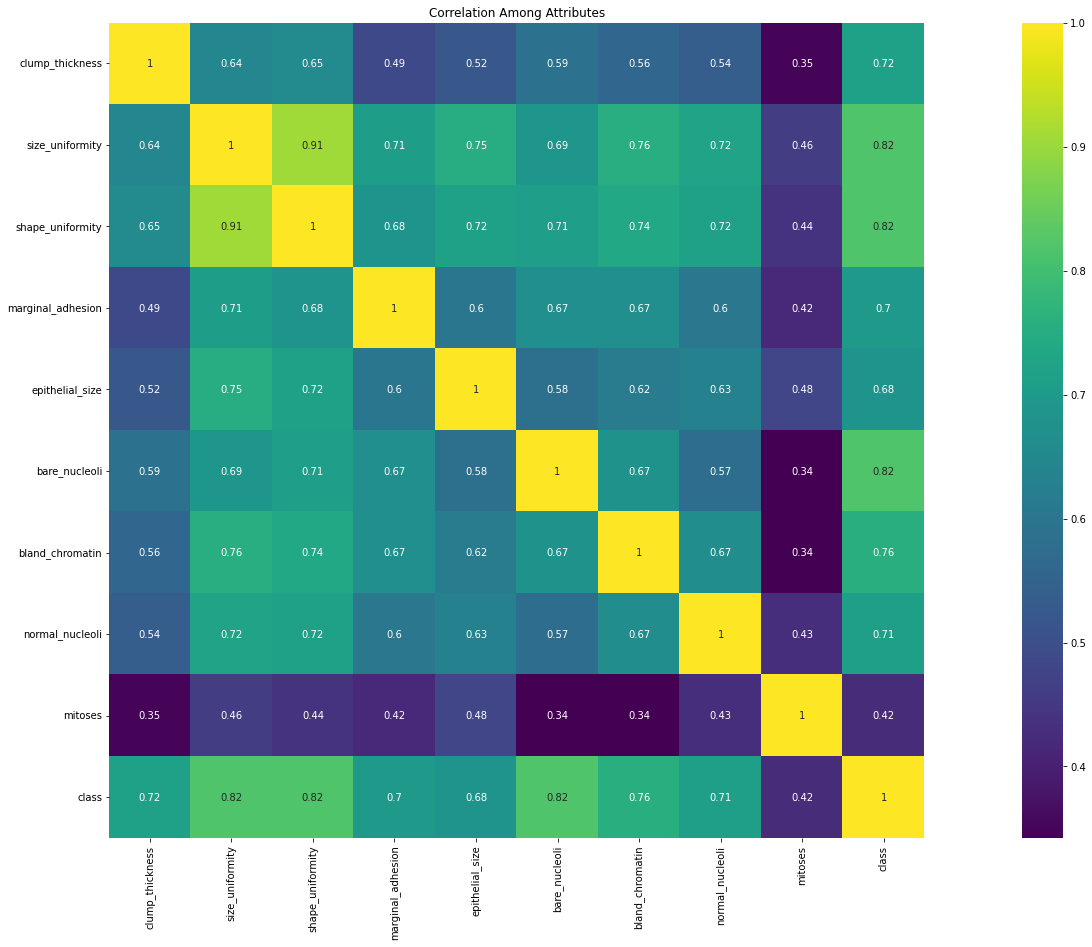

In [25]:
#Comparing the correlation among attributes
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(), annot=True, cmap="viridis", vmax=1, square=True)
plt.title("Correlation Among Attributes")
plt.show()

<IPython.core.display.Javascript object>

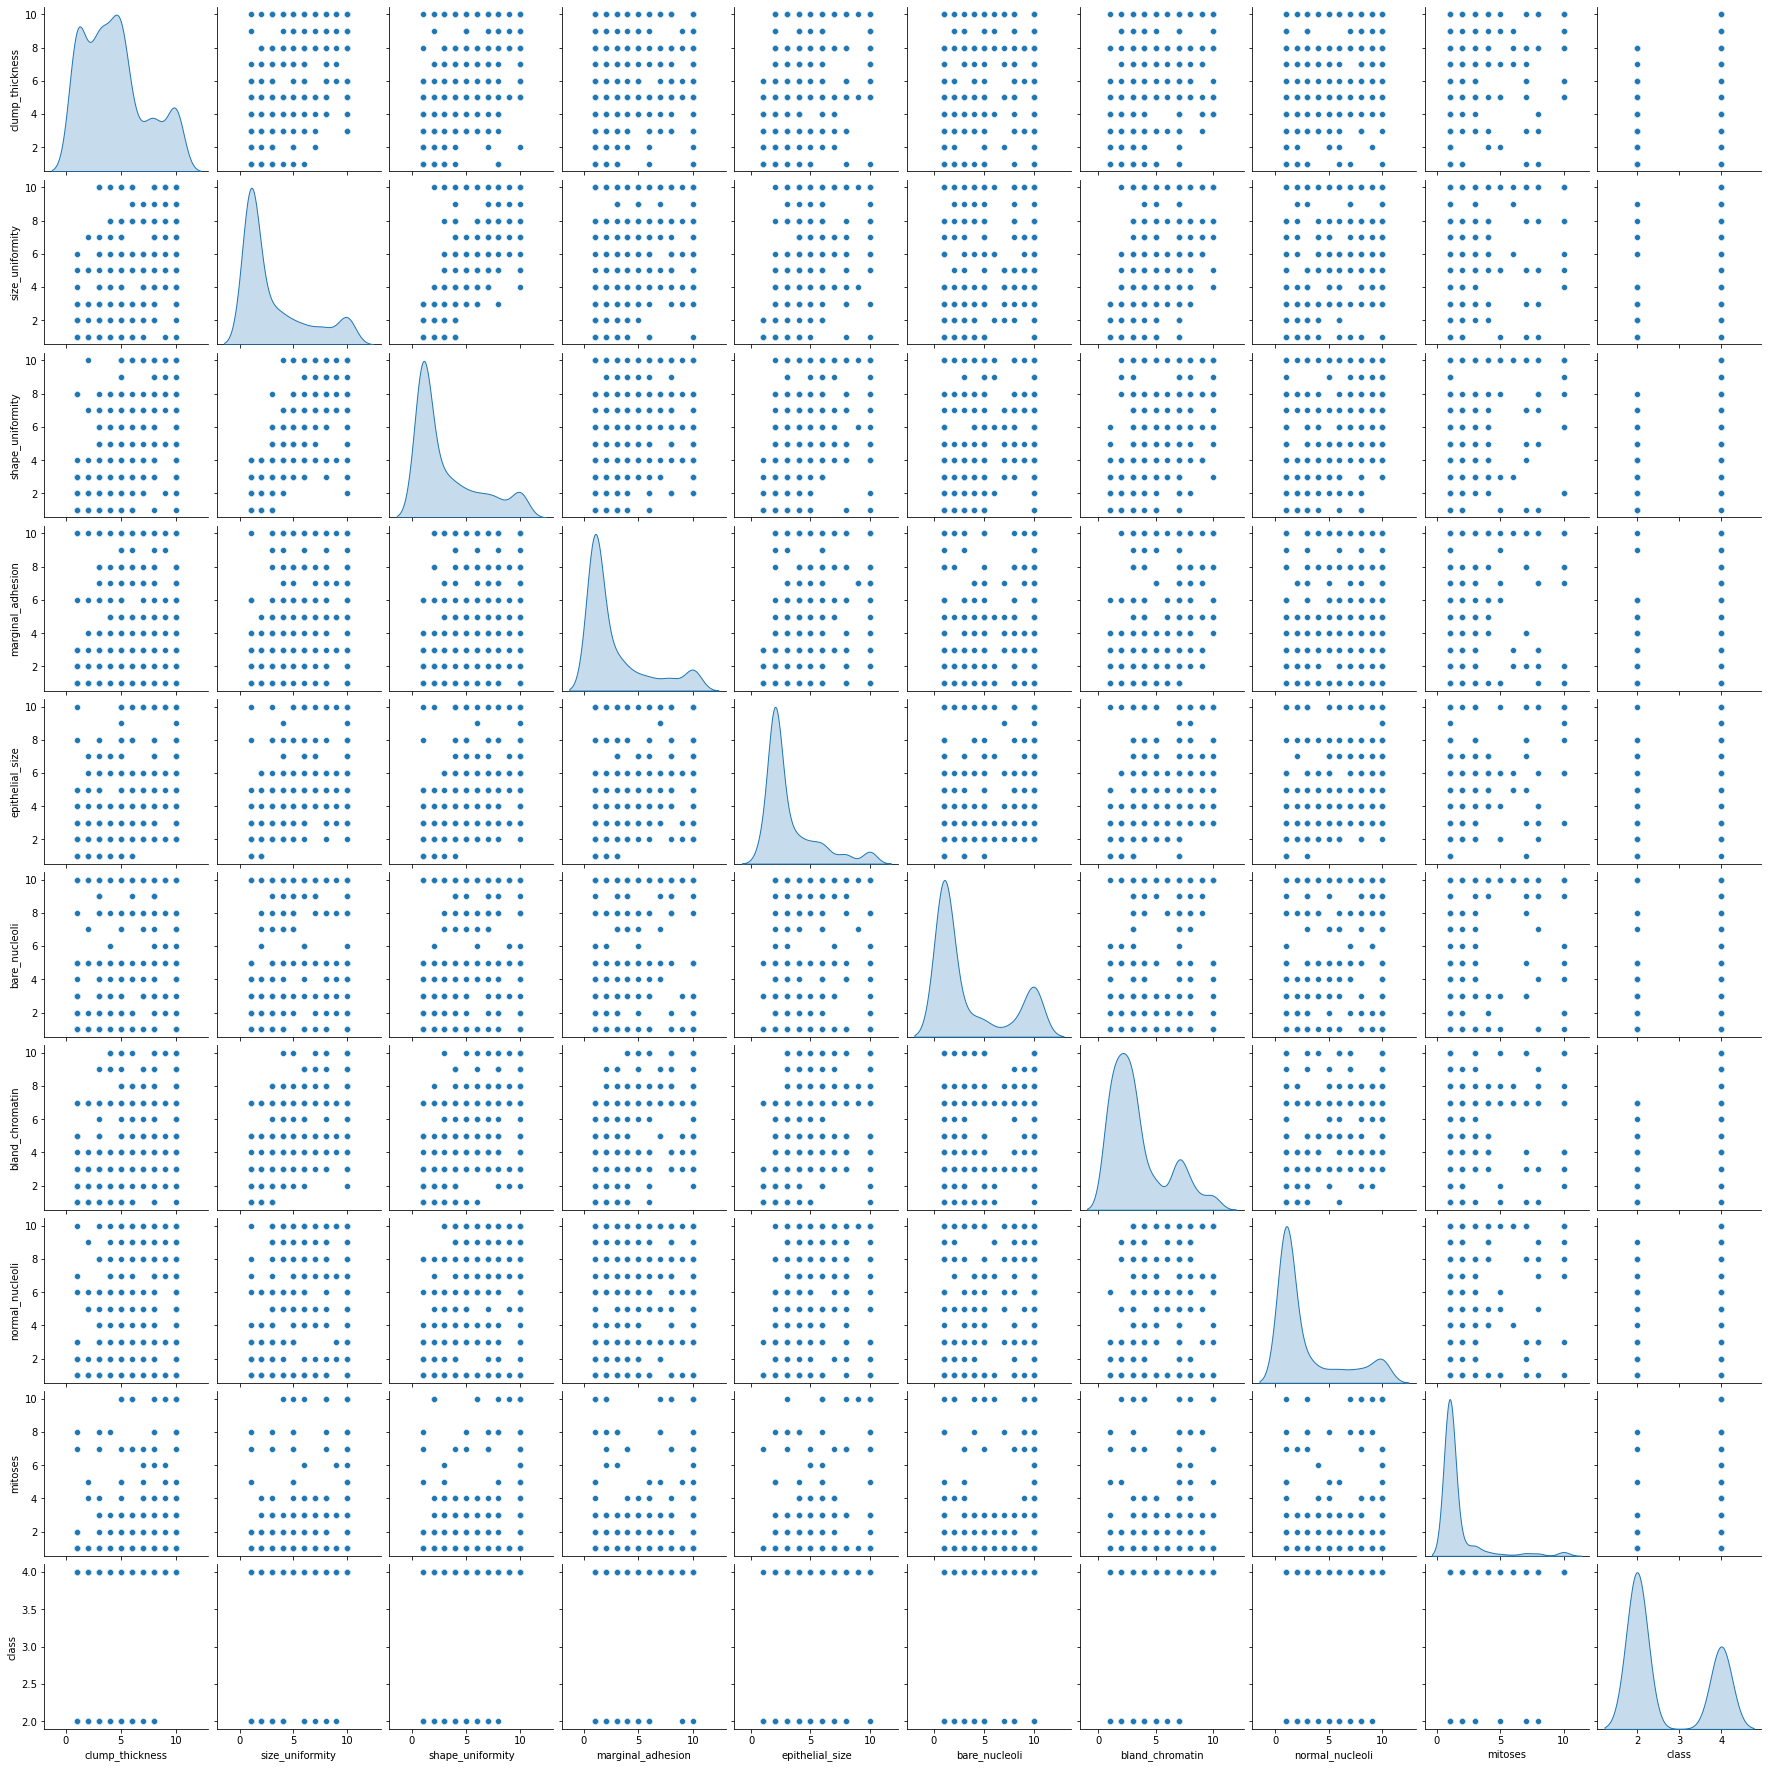

In [26]:
#Pairplot of the correlation between various independent attributes
sns.pairplot(df, diag_kind="kde");

#Model Building

In [27]:
# Dividing our dataset into training and testing set

x = df.drop('class', axis=1)  #selecting all the attributes except the class attribute
y = df['class'] #selecting class attribute

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=1)

**KNeighbors Classifier**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [30]:
## Trrying to find the best fit n_neighbors for our model
score = list()
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  scores1= cross_val_score(knn, x,y,cv=10)
  score.append(np.mean(scores1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

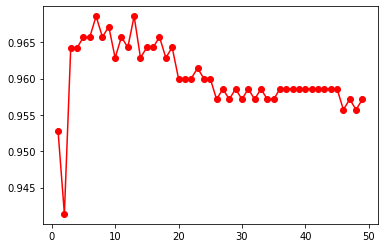

In [31]:
dist= range(1,50)
plt.plot(dist,score,color="red",marker="o")

In [32]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
param_grid={"n_neighbors":[5,10,12,15],"weights":["distance","uniform"]}
grid= GridSearchCV(model,param_grid,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 12, 15],
                         'weights': ['distance', 'uniform']},
             verbose=1)

In [33]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


In [34]:
knn_model=KNeighborsClassifier(n_neighbors=5,weights="distance")

In [35]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [36]:
y_predknn=knn_model.predict(x_test)

In [37]:
print(" The KNeighborsClassifier Agorithm is predicting at {0:.2g}% accuracy".format(knn_model.score(x_test, y_test)*100))

 The KNeighborsClassifier Agorithm is predicting at 98% accuracy


**Support Vector Machine**

In [38]:
from sklearn.svm import SVC

In [39]:
##Also finding the best hyperparameters
models= SVC()
params_grid={"C":[0,1,2,3,4,5],"gamma":[1,0.1,0.01],"gamma":["scale","auto"],"kernel":["linear"]}
grid=GridSearchCV(models,params_grid,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             verbose=1)

In [40]:
print(grid.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [41]:
svc_model=SVC(C=1,gamma="scale",kernel="linear")

In [42]:
svc_model.fit(x_train,y_train)


SVC(C=1, kernel='linear')

In [43]:
y_predsvc=svc_model.predict(x_test)

In [44]:
print(" The SupportVectorClassifier Agorithm is predicting at {0:.2g}% accuracy".format(svc_model.score(x_test, y_test)*100))

 The SupportVectorClassifier Agorithm is predicting at 97% accuracy


In [45]:
from sklearn.metrics import classification_report

print("classification_report for KNN")

print("..."*10)

print(classification_report(y_test, y_predknn))

classification_report for KNN
..............................
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.99      0.95      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



In [46]:
from sklearn.metrics import classification_report

print("classification_report for SVC")

print("..."*10)

print(classification_report(y_test, y_predsvc))

classification_report for SVC
..............................
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.97      0.95      0.96        73

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



Confusion Matrix For KNeighborsClassifier


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

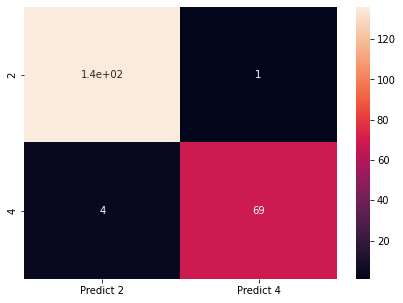

In [47]:
from sklearn import metrics

print("Confusion Matrix For KNeighborsClassifier")
cm=metrics.confusion_matrix(y_test, y_predknn, labels=[2, 4])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict 2","Predict 4"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix For SVC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

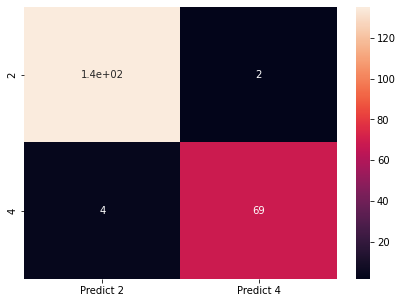

In [48]:
from sklearn import metrics

print("Confusion Matrix For SVC")
cm=metrics.confusion_matrix(y_test, y_predsvc, labels=[2, 4])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict 2","Predict 4"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

According to our confusion matrix, our KNN model is performing slightly better than our SVC, but both are performing at a very high rate of 98 and 97 percent for KNN and SVC respectively in that order

In [51]:
import pickle
pickle.dump(knn_model, open("model.pkl","wb"))
loaded_model=pickle.load(open("model.pkl","rb"))

In [50]:
from google.colab import files

df.to_csv('breast_cancer.csv', encoding = 'utf-8-sig', index=False) 
files.download('breast_cancer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
